Pinyan Xu <br>
pinyanxu@gmail.com

## Solve classification task with the UCI ML Breast Cancer Wisconsin (Diagostic) dataset

The UCI ML Breast Cancer Wisconsin (Diagostic) dataset contains diagnosis results and ten features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. The goal of this task is to train a machine learning model to classify breast cancer diagnosis based on the first two features:
    <li>radius (mean of distances from center to points on the perimeter)
    <li>texture (standard deviation of gray-scale values)

We first load the dataset and plot the scatter points. Yellow represents benigh diagnosis and purple represents malignant diagnosis.

In [30]:
#load the dataset with the first two feature radius and texture 
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
  
breast_cancer_data = load_breast_cancer()
  
# Place the date in pandas data frame
df = pd.DataFrame(data=breast_cancer_data.data, 
                  columns=breast_cancer_data.feature_names)
  
# Display the first 5 rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


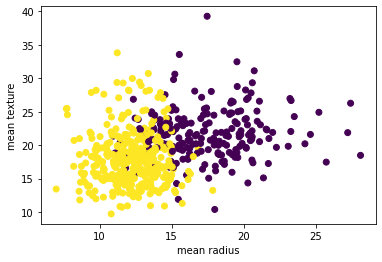

In [16]:
X, y = load_breast_cancer(return_X_y=True)
X = X[:, :2]
plt.clf()
plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

### Training

We now split the dataset into training and test sets.

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Train a decision tree classifier.

In [18]:
# Use Decision Tree Classifier to train the classification model on the dataset
clf = DecisionTreeClassifier(random_state=0)
Model = clf.fit(X_train, y_train, sample_weight=None, check_input=True)
prediction = Model.predict(X_test)

In [19]:
# Evaluate the model's accuracy
print("Train Accuracy:", Model.score(X_train,y_train))
print("Test Accuracy:", Model.score(X_test,y_test))

Train Accuracy: 1.0
Test Accuracy: 0.8391608391608392


The clf model we trained above is a decision tree classifier with 100% train accuracy and 83.92% of test accuracy. It means that given the training data, we can predict the diagnosis result accurately based on the radius and texture feature; given the test data, we can achieve 83.92% accuracy in predicting the diagnosis result.

### Pruning

To improve the accuracy, we implement a pruning process.

In [25]:
# Find the parameter value for the best accuracy
lam = np.arange(0, 0.5, 0.001)
rst = []
train_accs = []
accs = []

for alpha in lam:
    clf1 = DecisionTreeClassifier(ccp_alpha=alpha)
    clf1.fit(X_train, y_train)
    rst.append(clf1)
    acc = clf1.score(X_test, y_test)
    accs.append(acc)
    train_acc = clf1.score(X_train, y_train)
    train_accs.append(train_acc)
    
best = max(accs)
best_ind = accs.index(best)
best_lam = lam[best_ind]
clf_best = rst[best_ind]

In [26]:
print("best lambda is", best_lam)
print("The accuracy is", best)

best lambda is 0.02
The accuracy is 0.916083916083916


After applying the pruning algorithm, we improve the test accuracy to 91.61%.

### Plotting

Now we can plot the decision regions of the decision tree model we trained above.

In [31]:
# Python
def plot_regions(tree):
    plot_colors = ["purple", "yellow"]
    plot_step = 0.02
    breast_cancer = load_breast_cancer ()
    X = breast_cancer.data
    y = breast_cancer.target
    plt.clf()

    idx = np.arange(X.shape [0])
    np.random.shuffle(idx)

    X = X[idx]
    y = y[idx]
    x_min , x_max = X[:, 0]. min() - 1, X[:, 0]. max() + 1
    y_min , y_max = X[:, 1]. min() - 1, X[:, 1]. max() + 1
    xx, yy = np.meshgrid(np.arange(x_min , x_max , plot_step),
    
    np.arange(y_min , y_max , plot_step ))
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel ()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx , yy , Z, cmap=plt.cm.Paired)

    plt.xlabel(breast_cancer.feature_names [0])
    plt.ylabel(breast_cancer.feature_names [1])
    plt.axis("tight")

    for i, color in zip(range(2), plot_colors ):
        idx = np.where(y == i)
        plt.scatter(X[idx , 0], X[idx , 1], c=color ,
            label=breast_cancer.target_names[i],
            cmap=plt.cm.Paired)

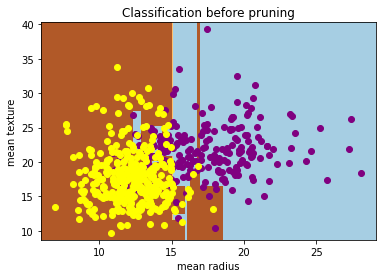

In [35]:
plot_regions(clf)
plt.title("Classification before pruning")
plt.show()

We can see from the plot above that the decision tree classifier before pruning involves a problem of overfitting. 

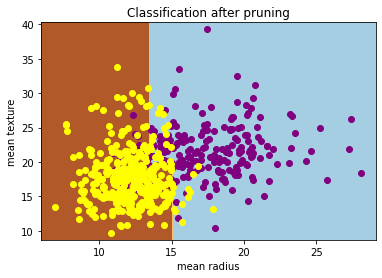

In [36]:
plot_regions(clf_best)
plt.title("Classification after pruning")
plt.show()

After pruning, the model avoids overfitting. The classification results are as follows:
  <li>When the mean radius is between 0 and 15, and the mean texture is in the range of 10 to 20, the diagnosis is Benign.
  <li>When the mean radius is between 0 and 13, and the mean texture is in the range of 20 to 40, the diagnosis is Benign.
  <li>Otherwise, the diagnosis is malignant.

# 

# 

# 

### Exercise 2 

part (a)

In [78]:
#python
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles
# create dataset
X, y = make_circles(n_samples =400, noise =0.2, factor =0.5,
random_state =0)
X = StandardScaler (). fit_transform(X)
X_train , X_test , y_train , y_test = train_test_split(X, y,
test_size =.4, random_state =42)

Train accuracy is,  0.6666666666666666
Test accuracy is,  0.5375


/tmp/ipykernel_160/1018925880.py:22: UserWarning: No contour levels were found within the data range.
  plt.contour(xx , yy , np.round(Z), 0)


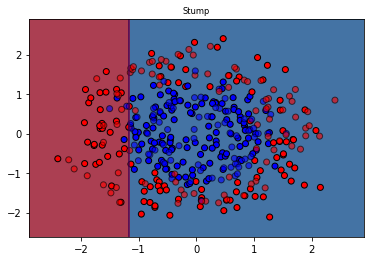

In [80]:
from sklearn.tree import DecisionTreeClassifier
# ADD CODES HERE:
# clf = ...
clf = DecisionTreeClassifier(max_depth=1,random_state=0)
clf.fit(X_train,y_train)

print("Train accuracy is, ", clf.score(X_train,y_train))
print("Test accuracy is, ", clf.score(X_test,y_test))
# plotting
x_min , x_max = X[:, 0]. min() - .5, X[:, 0]. max() + .5
y_min , y_max = X[:, 1]. min() - .5, X[:, 1]. max() + .5
h = .02
xx , yy = np.meshgrid(np.arange(x_min , x_max , h),
         np.arange(y_min , y_max , h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel ()])[: , 1]
Z = Z.reshape(xx.shape)
plt.figure ()
plt.title("Stump", fontsize='small')
cm = plt.cm.RdBu
cm_bright = ListedColormap (['#FF0000', '#0000FF'])
plt.contourf(xx , yy , Z, cmap=cm , alpha =.8)
plt.contour(xx , yy , np.round(Z), 0)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o',
    c=y_train , cmap=cm_bright , edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test ,
    cmap=cm_bright , alpha =0.6, edgecolors='k')


part (b)

In [88]:
import copy
from sklearn.utils import resample

class Bagging ():
    def __init__(self , base_classifier , n_bootstrap , portion ):
        self.base_classifier = base_classifier
        self.n_bootstrap = n_bootstrap
        self.portion = portion
        self.base_classifier_list = []
    
    def fit(self , X_train , y_train ):
        for i in range(self.n_bootstrap ):
            clf = copy.deepcopy(self.base_classifier)
            # ADD CODES HERE
            bagging_n = int(self.portion * X_train.shape[0])
            X_bagging,y_bagging= resample(X_train, y_train, n_samples = bagging_n, replace = True)
            clf.fit(X_bagging,y_bagging)
            self.base_classifier_list.append(clf)

    def predict_proba(self , X_test ):
        predict_prob = 0
        for i in range(self.n_bootstrap):
            predict_prob = predict_prob + self.base_classifier_list[i].predict_proba(X_test)[:,1]
        return predict_prob/self.n_bootstrap
        
        
    def score(self , X_test , y_test ):
        y_pred = self.predict_proba(X_test)
        acc = sum(np.round(y_pred) == y_test) / len(y_test)
        return acc

clf = Bagging(DecisionTreeClassifier(max_depth =1),
n_bootstrap =200, portion =0.8)
clf.fit(X_train , y_train)
# PLOT FIGURE HERE (USE SIMILAR CODES AS ABOVE)
print("Train accuracy is, ", clf.score(X_train,y_train))
print("Test accuracy is, ", clf.score(X_test,y_test))


Train accuracy is,  0.7916666666666666
Test accuracy is,  0.61875


With bagging, the trained model improves its test accuracy compared to using only the base classifier.

/tmp/ipykernel_160/3562223574.py:9: UserWarning: No contour levels were found within the data range.
  plt.contour(xx , yy , np.round(Z), 0)


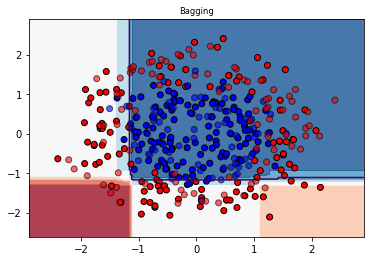

In [89]:
# plotting
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel ()])
Z = Z.reshape(xx.shape)
plt.figure ()
plt.title("Bagging", fontsize='small')
cm = plt.cm.RdBu
cm_bright = ListedColormap (['#FF0000', '#0000FF'])
plt.contourf(xx , yy , Z, cmap=cm , alpha =.8)
plt.contour(xx , yy , np.round(Z), 0)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o',
    c=y_train , cmap=cm_bright , edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test ,
    cmap=cm_bright , alpha =0.6, edgecolors='k')

Try with n_bootstrap=300, portion=0.5

Train accuracy is,  0.8
Test accuracy is,  0.63125


/tmp/ipykernel_160/2182348189.py:16: UserWarning: No contour levels were found within the data range.
  plt.contour(xx , yy , np.round(Z), 0)


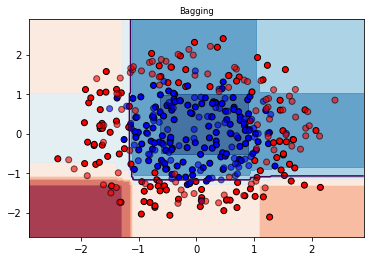

In [91]:
clf = Bagging(DecisionTreeClassifier(max_depth =1),
n_bootstrap =300, portion =0.5)
clf.fit(X_train , y_train)
# PLOT FIGURE HERE (USE SIMILAR CODES AS ABOVE)
print("Train accuracy is, ", clf.score(X_train,y_train))
print("Test accuracy is, ", clf.score(X_test,y_test))

# plotting
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel ()])
Z = Z.reshape(xx.shape)
plt.figure ()
plt.title("Bagging", fontsize='small')
cm = plt.cm.RdBu
cm_bright = ListedColormap (['#FF0000', '#0000FF'])
plt.contourf(xx , yy , Z, cmap=cm , alpha =.8)
plt.contour(xx , yy , np.round(Z), 0)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o',
    c=y_train , cmap=cm_bright , edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test ,
    cmap=cm_bright , alpha =0.6, edgecolors='k')

Try with n_bootstrap = 100, portion = 0.6

Train accuracy is,  0.7916666666666666
Test accuracy is,  0.625


/tmp/ipykernel_160/3765458603.py:16: UserWarning: No contour levels were found within the data range.
  plt.contour(xx , yy , np.round(Z), 0)


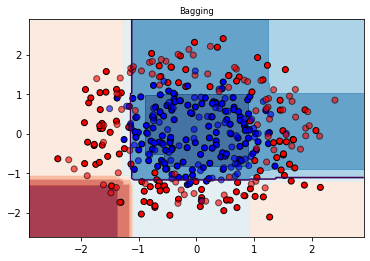

In [92]:
clf = Bagging(DecisionTreeClassifier(max_depth =1),
n_bootstrap =100, portion =0.6)
clf.fit(X_train , y_train)
# PLOT FIGURE HERE (USE SIMILAR CODES AS ABOVE)
print("Train accuracy is, ", clf.score(X_train,y_train))
print("Test accuracy is, ", clf.score(X_test,y_test))

# plotting
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel ()])
Z = Z.reshape(xx.shape)
plt.figure ()
plt.title("Bagging", fontsize='small')
cm = plt.cm.RdBu
cm_bright = ListedColormap (['#FF0000', '#0000FF'])
plt.contourf(xx , yy , Z, cmap=cm , alpha =.8)
plt.contour(xx , yy , np.round(Z), 0)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o',
    c=y_train , cmap=cm_bright , edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test ,
    cmap=cm_bright , alpha =0.6, edgecolors='k')

Try with n_bootstrap = 350, portion = 0.9

Train accuracy is,  0.7916666666666666
Test accuracy is,  0.61875


/tmp/ipykernel_160/3595110237.py:16: UserWarning: No contour levels were found within the data range.
  plt.contour(xx , yy , np.round(Z), 0)


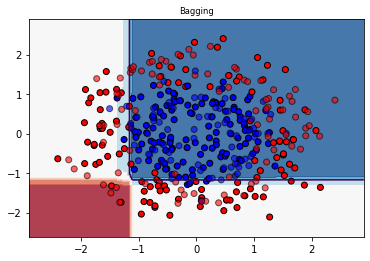

In [94]:
clf = Bagging(DecisionTreeClassifier(max_depth =1),
n_bootstrap =300, portion =0.9)
clf.fit(X_train , y_train)
# PLOT FIGURE HERE (USE SIMILAR CODES AS ABOVE)
print("Train accuracy is, ", clf.score(X_train,y_train))
print("Test accuracy is, ", clf.score(X_test,y_test))

# plotting
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel ()])
Z = Z.reshape(xx.shape)
plt.figure ()
plt.title("Bagging", fontsize='small')
cm = plt.cm.RdBu
cm_bright = ListedColormap (['#FF0000', '#0000FF'])
plt.contourf(xx , yy , Z, cmap=cm , alpha =.8)
plt.contour(xx , yy , np.round(Z), 0)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o',
    c=y_train , cmap=cm_bright , edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test ,
    cmap=cm_bright , alpha =0.6, edgecolors='k')

part (c)

In [104]:
class Boosting ():
    def __init__(self , base_classifier , n_iterations ):
        self.base_classifier = base_classifier
        self.n_iterations = n_iterations
        # ADD CODES HERE
        self.alphas = []
        self.base_classifier_list = []

    def fit(self , X_train , y_train ):
        y_train = 2 * y_train - 1
        # ADD CODES HERE
        w = np.ones(len(y_train))/len(y_train)
        
        for i in range(self.n_iterations):
            clf = copy.deepcopy(self.base_classifier)
            clf.fit(X_train,y_train, sample_weight=w)
            self.base_classifier_list.append(clf)
            prediction = clf.predict(X_train)
            
            error = np.zeros(len(y_train))
            for j in range(len(y_train)):
                if y_train[j] != prediction[j]:
                    error[j] = 1
                
            error_ = sum(error*w)/sum(w)
            
            alpha = np.log((1-error_)/error_)
            w = w * np.exp(alpha*error)
            self.alphas.append(alpha)
            

    def predict_label(self , X_test ):
        y_pred = np.zeros(X_test.shape[0])
        for i in range(len(self.base_classifier_list)):
            prediction = self.base_classifier_list[i].predict(X_test)
            y_pred = y_pred + self.alphas[i]*prediction
            
        return np.sign(y_pred)


    def score(self , X_test , y_test ):
        y_test = 2 * y_test - 1
        y_pred = self.predict_label(X_test)
        acc = sum(np.sign(y_pred) == y_test) / len(y_test)
        return acc



Train accuracy is,  0.95
Test accuracy is,  0.86875


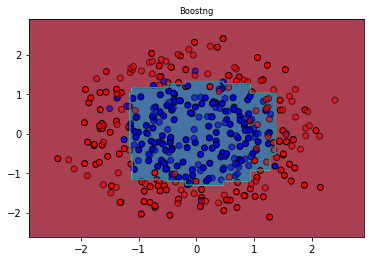

In [105]:
clf = Boosting(DecisionTreeClassifier(max_depth =1),n_iterations =200)
clf.fit(X_train , y_train)
print("Train accuracy is, ", clf.score(X_train,y_train))
print("Test accuracy is, ", clf.score(X_test,y_test))

# plotting
Z = clf.predict_label(np.c_[xx.ravel(), yy.ravel ()])
Z = Z.reshape(xx.shape)
plt.figure ()
plt.title("Boostng", fontsize='small')
cm = plt.cm.RdBu
cm_bright = ListedColormap (['#FF0000', '#0000FF'])
plt.contourf(xx , yy , Z, cmap=cm , alpha =.8)
plt.contour(xx , yy , np.round(Z), 0)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o',
    c=y_train , cmap=cm_bright , edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test ,
    cmap=cm_bright , alpha =0.6, edgecolors='k')

The trained model improves compared to using only the base classifier, and it also improves compared to using bagging.

In [106]:
clf = Boosting(DecisionTreeClassifier(max_depth =1),n_iterations =100)
clf.fit(X_train , y_train)
print("Train accuracy is, ", clf.score(X_train,y_train))
print("Test accuracy is, ", clf.score(X_test,y_test))

Train accuracy is,  0.9416666666666667
Test accuracy is,  0.8625


In [107]:
clf = Boosting(DecisionTreeClassifier(max_depth =1),n_iterations =500)
clf.fit(X_train , y_train)
print("Train accuracy is, ", clf.score(X_train,y_train))
print("Test accuracy is, ", clf.score(X_test,y_test))

Train accuracy is,  0.9833333333333333
Test accuracy is,  0.8375


In [108]:
clf = Boosting(DecisionTreeClassifier(max_depth =1),n_iterations =1000)
clf.fit(X_train , y_train)
print("Train accuracy is, ", clf.score(X_train,y_train))
print("Test accuracy is, ", clf.score(X_test,y_test))

Train accuracy is,  1.0
Test accuracy is,  0.8375


In [109]:
clf = Boosting(DecisionTreeClassifier(max_depth =1),n_iterations =1500)
clf.fit(X_train , y_train)
print("Train accuracy is, ", clf.score(X_train,y_train))
print("Test accuracy is, ", clf.score(X_test,y_test))

Train accuracy is,  1.0
Test accuracy is,  0.825


In [110]:
clf = Boosting(DecisionTreeClassifier(max_depth =1),n_iterations =2000)
clf.fit(X_train , y_train)
print("Train accuracy is, ", clf.score(X_train,y_train))
print("Test accuracy is, ", clf.score(X_test,y_test))

Train accuracy is,  1.0
Test accuracy is,  0.81875


When n_iterations is very large, the train accuracy increases, however, the test accuracy decrease.

part (d)

Train accuracy is,  0.9583333333333334
Test accuracy is,  0.85625


/tmp/ipykernel_160/13491001.py:16: UserWarning: No contour levels were found within the data range.
  plt.contour(xx , yy , np.round(Z), 0)


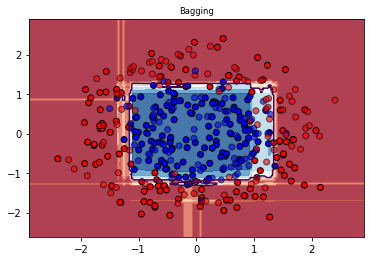

In [113]:
# Bagging with max_depth=5
clf = Bagging(DecisionTreeClassifier(max_depth =5),
n_bootstrap =200, portion =0.8)
clf.fit(X_train , y_train)
# PLOT FIGURE HERE (USE SIMILAR CODES AS ABOVE)
print("Train accuracy is, ", clf.score(X_train,y_train))
print("Test accuracy is, ", clf.score(X_test,y_test))

# plotting
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel ()])
Z = Z.reshape(xx.shape)
plt.figure ()
plt.title("Bagging", fontsize='small')
cm = plt.cm.RdBu
cm_bright = ListedColormap (['#FF0000', '#0000FF'])
plt.contourf(xx , yy , Z, cmap=cm , alpha =.8)
plt.contour(xx , yy , np.round(Z), 0)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o',
    c=y_train , cmap=cm_bright , edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test ,
    cmap=cm_bright , alpha =0.6, edgecolors='k')

Train accuracy is,  0.9541666666666667
Test accuracy is,  0.85


/tmp/ipykernel_160/444447567.py:16: UserWarning: No contour levels were found within the data range.
  plt.contour(xx , yy , np.round(Z), 0)


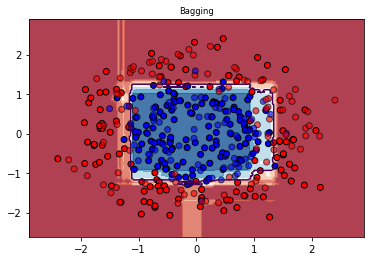

In [115]:
clf = Bagging(DecisionTreeClassifier(max_depth =5),
n_bootstrap =300, portion =0.5)
clf.fit(X_train , y_train)
# PLOT FIGURE HERE (USE SIMILAR CODES AS ABOVE)
print("Train accuracy is, ", clf.score(X_train,y_train))
print("Test accuracy is, ", clf.score(X_test,y_test))

# plotting
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel ()])
Z = Z.reshape(xx.shape)
plt.figure ()
plt.title("Bagging", fontsize='small')
cm = plt.cm.RdBu
cm_bright = ListedColormap (['#FF0000', '#0000FF'])
plt.contourf(xx , yy , Z, cmap=cm , alpha =.8)
plt.contour(xx , yy , np.round(Z), 0)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o',
    c=y_train , cmap=cm_bright , edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test ,
    cmap=cm_bright , alpha =0.6, edgecolors='k')

Train accuracy is,  1.0
Test accuracy is,  0.8375


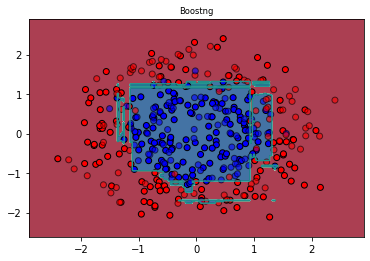

In [111]:
# Boosting with max_depth = 5
clf = Boosting(DecisionTreeClassifier(max_depth =5),n_iterations =200)
clf.fit(X_train , y_train)
print("Train accuracy is, ", clf.score(X_train,y_train))
print("Test accuracy is, ", clf.score(X_test,y_test))

# plotting
Z = clf.predict_label(np.c_[xx.ravel(), yy.ravel ()])
Z = Z.reshape(xx.shape)
plt.figure ()
plt.title("Boostng", fontsize='small')
cm = plt.cm.RdBu
cm_bright = ListedColormap (['#FF0000', '#0000FF'])
plt.contourf(xx , yy , Z, cmap=cm , alpha =.8)
plt.contour(xx , yy , np.round(Z), 0)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o',
    c=y_train , cmap=cm_bright , edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test ,
    cmap=cm_bright , alpha =0.6, edgecolors='k')

Train accuracy is,  1.0
Test accuracy is,  0.84375


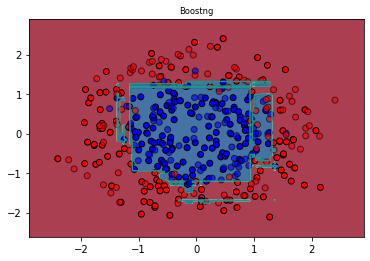

In [112]:
clf = Boosting(DecisionTreeClassifier(max_depth =5),n_iterations =500)
clf.fit(X_train , y_train)
print("Train accuracy is, ", clf.score(X_train,y_train))
print("Test accuracy is, ", clf.score(X_test,y_test))

# plotting
Z = clf.predict_label(np.c_[xx.ravel(), yy.ravel ()])
Z = Z.reshape(xx.shape)
plt.figure ()
plt.title("Boostng", fontsize='small')
cm = plt.cm.RdBu
cm_bright = ListedColormap (['#FF0000', '#0000FF'])
plt.contourf(xx , yy , Z, cmap=cm , alpha =.8)
plt.contour(xx , yy , np.round(Z), 0)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o',
    c=y_train , cmap=cm_bright , edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test ,
    cmap=cm_bright , alpha =0.6, edgecolors='k')

With max_depth=5, the test accuracy of bagging improves a lot; while the test accuracy of boosting does not change much.

### Exercise 3

In [119]:
pip install pandas

     |████████████████████████████████| 11.7 MB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 503 kB 7.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [120]:
import numpy as np
import pandas as pd
df = pd.read_csv('diabetes.csv')
df_name = df.columns
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X = df[df_name [0:8]]
y = df[df_name [8]]
X = MinMaxScaler (). fit_transform(X)
X_train , X_test , y_train , y_test = train_test_split(X, y,
test_size =0.25 , random_state =0, stratify=df['Outcome'])

In [127]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


clf1 = BaggingClassifier()
score1 = cross_val_score(clf1,X_train,y_train,cv=10)
print("The sample mean of Bagging classifier is " , np.mean(score1))
print("The standard deviation of Bagging classifier is ",  np.std(score1))

The sample mean of Bagging classifier is  0.7343012704174228
The standard deviation of Bagging classifier is  0.04340423174054713


In [128]:
clf2 = AdaBoostClassifier()
score2 = cross_val_score(clf2,X_train,y_train,cv=10)
print("The sample mean of adaboost classifier is " , np.mean(score2))
print("The standard deviation of adaboost classifier is ",  np.std(score2))

The sample mean of adaboost classifier is  0.7552329098608591
The standard deviation of adaboost classifier is  0.05411555016413558


In [129]:
clf3 = DecisionTreeClassifier()
score3 = cross_val_score(clf3,X_train,y_train,cv=10)
print("The sample mean of CART classifier is " , np.mean(score3))
print("The standard deviation of CART classifier is ",  np.std(score3))

The sample mean of CART classifier is  0.6943738656987295
The standard deviation of CART classifier is  0.04090496097813103


part (b)

In [137]:
def removeOutliers(df_out,nameOfFeature,drop=False):
    valueOfFeature = df_out[nameOfFeature]
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(valueOfFeature, 25.)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(valueOfFeature, 75.)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    # print "Outlier step:", step
    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values
    # df[~((df[nameOfFeature] >= Q1 - step) & (df[nameOfFeature] <= Q3 + step))]

    # Remove the outliers, if any were specified
    print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))
        return good_data
    else:
        print ("Nothing happens, df.shape = ",df_out.shape)
        return df_out

In [138]:
df = removeOutliers(df, "Pregnancies", drop=True)
df = removeOutliers(df, "BMI", drop=True)
df = removeOutliers(df, "Glucose", drop=True)
df = removeOutliers(df, "BloodPressure", drop=True)
df = removeOutliers(df, "SkinThickness", drop=True)
df = removeOutliers(df, "Insulin", drop=True)
df = removeOutliers(df, "DiabetesPedigreeFunction", drop=True)
df = removeOutliers(df, "Age", drop=True)

X = df[df_name [0:8]]
y = df[df_name [8]]
X = MinMaxScaler (). fit_transform(X)
X_train , X_test , y_train , y_test = train_test_split(X, y,
test_size =0.25 , random_state =0, stratify=df['Outcome'])

Number of outliers (inc duplicates): 4 and outliers: [15 17 14 14]
New dataset with removed outliers has 764 samples with 9 features each.
Number of outliers (inc duplicates): 19 and outliers: [ 0.   0.   0.   0.  53.2 55.   0.  67.1 52.3 52.3 52.9  0.   0.  59.4
  0.   0.  57.3  0.   0. ]
New dataset with removed outliers has 745 samples with 9 features each.
Number of outliers (inc duplicates): 5 and outliers: [0 0 0 0 0]
New dataset with removed outliers has 740 samples with 9 features each.
Number of outliers (inc duplicates): 39 and outliers: [  0   0  30 110   0 108 122   0   0   0   0   0   0   0   0   0   0 108
   0   0   0   0   0   0   0 110   0  24  38   0   0   0   0 106 106 106
 114   0   0]
New dataset with removed outliers has 701 samples with 9 features each.
Number of outliers (inc duplicates): 1 and outliers: [99]
New dataset with removed outliers has 700 samples with 9 features each.
Number of outliers (inc duplicates): 26 and outliers: [543 846 342 495 485 495 478 7

In [139]:
clf1 = BaggingClassifier()
score1 = cross_val_score(clf1,X_train,y_train,cv=10)
print("The sample mean of Bagging classifier is " , np.mean(score1))
print("The standard deviation of Bagging classifier is ",  np.std(score1))

The sample mean of Bagging classifier is  0.7434840425531916
The standard deviation of Bagging classifier is  0.06596514685188065


In [140]:
clf2 = AdaBoostClassifier()
score2 = cross_val_score(clf2,X_train,y_train,cv=10)
print("The sample mean of adaboost classifier is " , np.mean(score2))
print("The standard deviation of adaboost classifier is ",  np.std(score2))

The sample mean of adaboost classifier is  0.7434840425531914
The standard deviation of adaboost classifier is  0.08814996093887663


In [141]:
clf3 = DecisionTreeClassifier()
score3 = cross_val_score(clf3,X_train,y_train,cv=10)
print("The sample mean of CART classifier is " , np.mean(score3))
print("The standard deviation of CART classifier is ",  np.std(score3))

The sample mean of CART classifier is  0.7538563829787234
The standard deviation of CART classifier is  0.063369179420143


For bagging and CART, the CV score mean slightly increases, so there is a small improvement.
For adaboost, the CV score mean decreases, so there may not be improvement.

part (c)

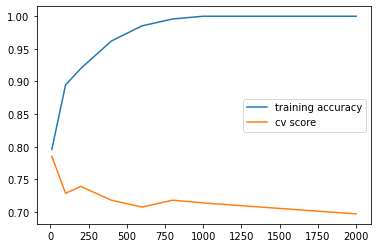

In [150]:
import matplotlib.pyplot as plt
# Adaboost with stump
iterations1 = [10,100,200,400,600,800,1000,1500,2000]
train_accuracy1 = []
cv_score1 = []

for i in iterations1:
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=i)
    score1 = np.mean(cross_val_score(clf,X_train,y_train,cv=10))
    cv_score1.append(score1)
    
    clf.fit(X_train,y_train)
    train_accuracy1.append(clf.score(X_train,y_train))
    
plt.plot(iterations1,train_accuracy1,label="training accuracy")
plt.plot(iterations1,cv_score1, label="cv score")
plt.legend()
plt.show()

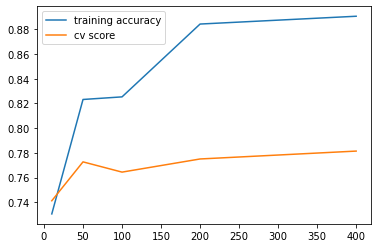

In [179]:
iterations2 = [10,50,100,200,400]
train_accuracy2 = []
cv_score2 = []

for i in iterations2:
    clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), max_samples=i)
    score2 = np.mean(cross_val_score(clf,X_train,y_train,cv=10))
    cv_score2.append(score2)
    
    clf.fit(X_train,y_train)
    train_accuracy2.append(clf.score(X_train,y_train))

plt.plot(iterations2,train_accuracy2,label="training accuracy")
plt.plot(iterations2,cv_score2, label="cv score")
plt.legend()
plt.show()

part (d)

For boosting, to maximize the training accuracy, we may want to choose n_iterations to be from 800 to 2000. 
And to maximize the cv score, we may want to choose n_iterations to be 1.

In [209]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=800)
clf.fit(X_train,y_train)
test_accuracy1 = clf.score(X_test,y_test)
print("The final test accuracy for boosting is ", test_accuracy1)

The final test accuracy for boosting is  0.660377358490566


In [210]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=1)
clf.fit(X_train,y_train)
test_accuracy1 = clf.score(X_test,y_test)
print("The final test accuracy for boosting is ", test_accuracy1)

The final test accuracy for boosting is  0.7547169811320755


For bagging to maximize the training accuracy and cv score, we may want to choose n_bootstrap to be 400.

In [228]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), max_samples=400)
clf.fit(X_train,y_train)
test_accuracy2 = clf.score(X_test,y_test)
print("The final test accuracy for bagging is ", test_accuracy2)

The final test accuracy for bagging is  0.7484276729559748
